# Porównanie

In [8]:
import copy
from datareader import get_data
from makespan import makespan, to_natural_order, get_order
from schrage import schrage_n2, schrage_n2_pmtn, schrage_nlogn, schrage_nlogn_pmtn
from random_search import random_search
from simulated_annealing import simulated_annealing
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

sets = ["data.000", "data.001", "data.002", "data.003", "data.004", "data.005", "data.006", "data.007", "data.008", "in50.txt", "in100.txt", "in200.txt"]

In [4]:
schrage_n2_makespans = []
schrage_n2_times = []
schrage_nlogn_makespans = []
schrage_nlogn_times = []
schrage_pmtn_n2_makespans = []
schrage_pmtn_n2_times = []
schrage_pmtn_nlogn_makespans = []
schrage_pmtn_nlogn_times = []
sa_makespans = []
sa_times = []

for set in sets:
    tasks = get_data(set)
    
    # schrage n2
    schrage_n2_order, schrage_n2_time = schrage_n2(tasks)
    shrage_n2_makespan = makespan(schrage_n2_order, tasks)
    schrage_n2_makespans.append(shrage_n2_makespan)
    schrage_n2_times.append(schrage_n2_time)
    
    # schrage nlogn
    schrage_nlogn_order, schrage_nlogn_time = schrage_nlogn(tasks)
    shrage_nlogn_makespan = makespan(schrage_nlogn_order, tasks)
    schrage_nlogn_makespans.append(shrage_nlogn_makespan)
    schrage_nlogn_times.append(schrage_nlogn_time)
    
    # schrage pmtn n2
    shrage_pmtn_n2_makespan, schrage_pmtn_n2_order, schrage_pmtn_n2_time = schrage_n2_pmtn(tasks)
    schrage_pmtn_n2_makespans.append(shrage_pmtn_n2_makespan)
    schrage_pmtn_n2_times.append(schrage_pmtn_n2_time)
    
    # schrage pmtn nlogn
    shrage_pmtn_nlogn_makespan, schrage_pmtn_nlogn_order, schrage_pmtn_nlogn_time = schrage_nlogn_pmtn(tasks)
    schrage_pmtn_nlogn_makespans.append(shrage_pmtn_nlogn_makespan)
    schrage_pmtn_nlogn_times.append(schrage_pmtn_nlogn_time)

    # simulated anealing
    sa_order, sa_time = simulated_annealing(tasks, 5000000, 0.0001, 0.999)
    sa_makespan = makespan(sa_order, tasks)
    sa_makespans.append(sa_makespan)
    sa_times.append(sa_time)

In [18]:
print("Average [SCHRAGE N2] CMAX: {}, TIME: {}" .format(int(np.mean(schrage_n2_makespans)), "%.2f"%np.mean(schrage_n2_times)))
print("Average [SCHRAGE NLOGN] CMAX: {}, TIME: {}" .format(int(np.mean(schrage_nlogn_makespans)), "%.2f"%np.mean(schrage_nlogn_times)))
print("Average [SCHRAGE PMTN N2] CMAX: {}, TIME: {}" .format(int(np.mean(schrage_pmtn_n2_makespans)), "%.2f"%np.mean(schrage_pmtn_n2_times)))
print("Average [SCHRAGE PMTN NLOGN] CMAX: {}, TIME: {}" .format(int(np.mean(schrage_pmtn_nlogn_makespans)), "%.2f"%np.mean(schrage_pmtn_nlogn_times)))
print("Average [SA] CMAX: {}, TIME: {}" .format(int(np.mean(sa_makespans)), "%.2f"%np.mean(sa_times)))

Average [SCHRAGE N2] CMAX: 3272, TIME: 3.65
Average [SCHRAGE NLOGN] CMAX: 3271, TIME: 0.82
Average [SCHRAGE PMTN N2] CMAX: 3237, TIME: 6.91
Average [SCHRAGE PMTN NLOGN] CMAX: 3237, TIME: 2.08
Average [SA] CMAX: 3249, TIME: 4032.41


In [20]:
d = {'SCHRAGE N2 CMAX': schrage_n2_makespans, 'SCHRAGE NLOGN CMAX': schrage_nlogn_makespans, 'SCHRAGE PMTN N2 CMAX': schrage_pmtn_n2_makespans, 'SCHRAGE PMTN NLOGN CMAX': schrage_pmtn_nlogn_makespans, 'SA CMAX': sa_makespans}
table = pd.DataFrame(data=d)
print("PORÓWNANIE MAKESPANÓW")
table

PORÓWNANIE MAKESPANÓW


,SCHRAGE N2 CMAX,SCHRAGE NLOGN CMAX,SCHRAGE PMTN N2 CMAX,SCHRAGE PMTN NLOGN CMAX,SA CMAX
0,283,283,221,221,228
1,3109,3109,3026,3026,3026
2,3708,3708,3654,3654,3665
3,3353,3335,3309,3309,3309
4,3235,3235,3172,3172,3191
5,3625,3625,3618,3618,3627
6,3446,3446,3439,3439,3446
7,3862,3862,3820,3820,3821
8,3645,3645,3633,3633,3634
9,1513,1513,1492,1492,1492


In [31]:
shrage_perc_faster = []
shrage_pmtn_perc_faster = []
for i in range(0, len(schrage_n2_times)):
    shrage_perc_faster.append((schrage_n2_times[i]-schrage_nlogn_times[i])/schrage_n2_times[i]*100)
    
for i in range(0, len(schrage_n2_times)):
    shrage_pmtn_perc_faster.append((schrage_pmtn_n2_times[i]-schrage_pmtn_nlogn_times[i])/schrage_pmtn_n2_times[i]*100)

d = {'SCHRAGE N2 CMAX': schrage_n2_times, 'SCHRAGE NLOGN CMAX': schrage_nlogn_times ,'SCHRAGE PMTN N2 CMAX': schrage_pmtn_n2_times, 'SCHRAGE PMTN NLOGN CMAX': schrage_pmtn_nlogn_times, '% DIF PMTN': shrage_pmtn_perc_faster, 'SA CMAX': sa_times}
table = pd.DataFrame(data=d)
print("PORÓWNANIE CZASÓW")
table

PORÓWNANIE CZASÓW


,SCHRAGE N2 CMAX,SCHRAGE NLOGN CMAX,% DIF,SCHRAGE PMTN N2 CMAX,SCHRAGE PMTN NLOGN CMAX,% DIF PMTN,SA CMAX
0,0.183531,0.051527,71.924634,0.345447,0.147452,57.315594,438.077169
1,7.778496,0.658176,91.538519,9.261039,1.854821,79.971783,3279.894987
2,1.801499,0.548398,69.558795,4.693755,1.628993,65.294460,3199.539616
3,1.878004,0.337211,82.044181,3.914525,0.979436,74.979442,3319.648262
4,2.150096,0.628884,70.750887,4.778725,1.598051,66.559051,3173.180796
5,1.858668,0.565228,69.589620,4.490739,1.532932,65.864594,3174.028399
6,1.789715,0.624681,65.096063,4.661221,1.648644,64.630641,3197.478728
7,1.840448,0.582484,68.350967,4.702910,1.792451,61.886343,3207.913275
8,1.793841,0.597444,66.694707,4.446805,1.561557,64.883619,3273.760963
9,1.813763,0.621885,65.712996,4.899580,1.743873,64.407704,3179.627790


# Podsumowanie

PORÓWNANIE CMAX


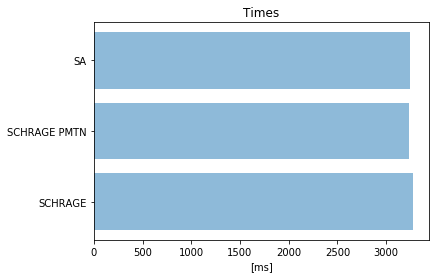

In [36]:
times = []
times.append(np.mean(schrage_n2_makespans))
times.append(np.mean(schrage_pmtn_n2_makespans))
times.append(np.mean(sa_makespans))
             
objects = ('SCHRAGE', 'SCHRAGE PMTN', 'SA')
y_pos = np.arange(len(times))

plt.barh(y_pos, times, align='center', alpha=0.5)
plt.yticks(y_pos, objects)
plt.xlabel('[ms]')
plt.title('Times')
print("PORÓWNANIE CMAX")
plt.show()

In [3]:
times = []
times.append(np.mean(schrage_n2_times))
times.append(np.mean(schrage_nlogn_times))
times.append(np.mean(schrage_pmtn_n2_times))
times.append(np.mean(schrage_pmtn_nlogn_times))
             
objects = ('SCHRAGE N2', 'SCHRAGE NLOGN', 'SCHRAGE PMTN N2', 'SCHRAGE PMTN NLOGN')
y_pos = np.arange(len(times))

plt.barh(y_pos, times, align='center', alpha=0.5)
plt.yticks(y_pos, objects)
plt.xlabel('[ms]')
plt.title('Times')
print("PORÓWNANIE CZASÓW")
plt.show()

NameError: name 'np' is not defined

# Test

In [33]:
from makespan import create_instances

taskset = []
x = []

for i in range(1, 500):
    taskset.append(create_instances(i))
    x.append(i)

In [34]:
schrage_n2_makespans = []
schrage_n2_times = []
schrage_nlogn_makespans = []
schrage_nlogn_times = []
schrage_pmtn_n2_makespans = []
schrage_pmtn_n2_times = []
schrage_pmtn_nlogn_makespans = []
schrage_pmtn_nlogn_times = []

for tasks in taskset:
    
    # schrage n2
    schrage_n2_order, schrage_n2_time = schrage_n2(tasks)
    shrage_n2_makespan = makespan(schrage_n2_order, tasks)
    schrage_n2_makespans.append(shrage_n2_makespan)
    schrage_n2_times.append(schrage_n2_time)
    
    # schrage nlogn
    schrage_nlogn_order, schrage_nlogn_time = schrage_nlogn(tasks)
    shrage_nlogn_makespan = makespan(schrage_nlogn_order, tasks)
    schrage_nlogn_makespans.append(shrage_nlogn_makespan)
    schrage_nlogn_times.append(schrage_nlogn_time)
    
    # schrage pmtn n2
    shrage_pmtn_n2_makespan, schrage_pmtn_n2_order, schrage_pmtn_n2_time = schrage_n2_pmtn(tasks)
    schrage_pmtn_n2_makespans.append(shrage_pmtn_n2_makespan)
    schrage_pmtn_n2_times.append(schrage_pmtn_n2_time)
    
    # schrage pmtn nlogn
    shrage_pmtn_nlogn_makespan, schrage_pmtn_nlogn_order, schrage_pmtn_nlogn_time = schrage_nlogn_pmtn(tasks)
    schrage_pmtn_nlogn_makespans.append(shrage_pmtn_nlogn_makespan)
    schrage_pmtn_nlogn_times.append(schrage_pmtn_nlogn_time)


SCHRAGE


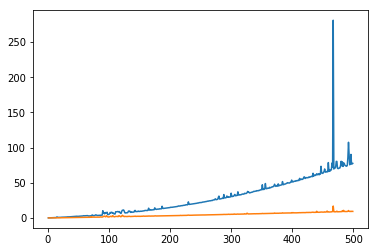

In [35]:
print("SCHRAGE")
plt.plot(x, schrage_n2_times)
plt.plot(x, schrage_nlogn_times)
plt.show()

SCHRAGE PMTN


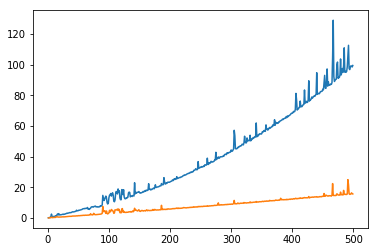

In [36]:
print("SCHRAGE PMTN")
plt.plot(x, schrage_pmtn_n2_times)
plt.plot(x, schrage_pmtn_nlogn_times)
plt.show()